In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import integrate
import itertools
import collections

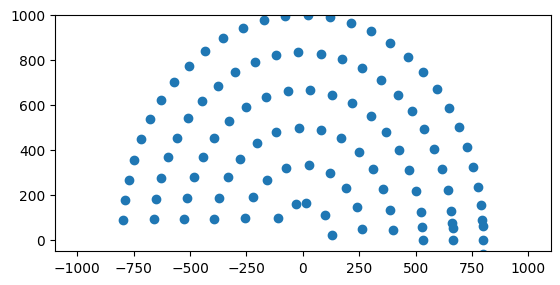

In [11]:
"""
x軸方向に-xrgからxrgまで等差数列を作成
->左側が切れてしまう

y軸方向に-yrgから始めて一周する事で、解消できる。

[x,y]において、if y<0 -> delete


"""



# merge -y<<y

def get_points(xrg, yrg, layers, DIS):
    def get_points_merge(xrg, yrg):

      # get x coordination
      xc, r_xc, xandy, r_xandy = [], [], [], []
      yc, r_yc = np.linspace(-yrg, yrg, 1000), np.linspace(-yrg, yrg, 1000)

      r_yc = r_yc[r_yc != -yrg]
      r_yc = r_yc[r_yc != yrg]
      r_yc = r_yc[::-1]

      for a in yc:
          xc.append(abs(xrg/yrg)*np.sqrt(yrg**2-a**2))

      for a, b in zip(yc, xc):
          xandy.append([a, b])

      for a in r_yc:
          r_xc.append(-(abs(xrg/yrg))*np.sqrt(yrg**2-a**2))

      for a, b in zip(r_yc, r_xc):
          r_xandy.append([a, b])

      xandy = xandy + r_xandy
      xandy = np.floor(xandy)

      L_points, a_idx = [], []

      for i in range(0, 1001):
          if i == 0:
            aaa = 0

          pre, q1, q2 = np.array(xandy[aaa,:]), np.array(xandy[i+1,:]), np.array(xandy[i+2,:])
          dis1, dis2 = np.linalg.norm(q1 - pre), np.linalg.norm(q2 - pre)
          d1, d2 = abs(DIS-dis1), abs(DIS-dis2)
          #print(d1)

          if d1 >= d2:
            pass

          else:
            #append q2
            a_idx.append(i)
            aaa = i

          for a in a_idx:
            L_points.append(np.array(xandy[a, :]))

      L_points = np.array(L_points)

      # delete duplication value
      uni = np.unique(L_points, axis=0)
      ert.append(uni)

      return ert

    xrg_list, yrg_list, layers_list =\
          np.floor([((n+1)*xrg)/layers for n in range(layers-1)] + [xrg]),\
          np.floor([((n+1)*yrg)/layers for n in range(layers-1)] + [yrg]),\
          np.floor(range(1, layers+1))

    ert = []
    for a, b in zip(xrg_list, yrg_list):
      ert = get_points_merge(a,b)

    return ert


DIS = 100
layers = 6
xrg = 1000
yrg = 800

ert = get_points(xrg, yrg, layers, DIS)



def flatten(l):
    for el in l:
        if isinstance(el, collections.abc.Iterable) and not isinstance(el, (str, bytes)):
            yield from flatten(el)
        else:
            yield el

ert_chain = list(flatten(ert))

x_chain = list(map(lambda x: math.floor(x), ert_chain[0::2]))
y_chain = list(map(lambda x: math.floor(x), ert_chain[1::2]))

xy_chain = [x_chain, y_chain]

points_temp = []

for a, b in zip(x_chain, y_chain):
   points_temp.append([a, b])

points_temp = np.array(points_temp)

plot = plt.subplot()
plot.set_aspect('equal')
plot.set_xlim([-1100, 1100])
plot.set_ylim([-50, 1000])
plt.scatter(points_temp[:,0], points_temp[:,1])
plt.show()

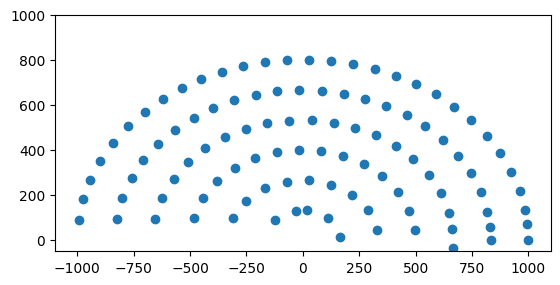

In [ ]:
# merge -x<<x

def get_points(xrg, yrg, layers, DIS):
    def get_points_merge(xrg, yrg):

      # get y coordination
      yc, r_yc, xandy, r_xandy = [], [], [], []
      xc, r_xc = np.linspace(-xrg, xrg, 1000), np.linspace(-xrg, xrg, 1000)

      r_xc = r_xc[r_xc != -xrg]
      r_xc = r_xc[r_xc != xrg]
      r_xc = r_xc[::-1]

      for a in xc:
          yc.append(abs(yrg/xrg)*np.sqrt(xrg**2-a**2))

      for a, b in zip(xc, yc):
          xandy.append([a, b])

      for a in r_xc:
          r_yc.append(-(abs(yrg/xrg))*np.sqrt(xrg**2-a**2))

      for a, b in zip(r_xc, r_yc):
          r_xandy.append([a, b])

      xandy = xandy + r_xandy
      xandy = np.floor(xandy)

      L_points, a_idx = [], []

      for i in range(0, 1001):
          if i == 0:
            aaa = 0

          pre, q1, q2 = np.array(xandy[aaa,:]), np.array(xandy[i+1,:]), np.array(xandy[i+2,:])
          dis1, dis2 = np.linalg.norm(q1 - pre), np.linalg.norm(q2 - pre)
          d1, d2 = abs(DIS-dis1), abs(DIS-dis2)
          #print(d1)

          if d1 >= d2:
            pass

          else:
            #append q2
            a_idx.append(i)
            aaa = i

          for a in a_idx:
            L_points.append(np.array(xandy[a, :]))

      L_points = np.array(L_points)

      # delete duplication value
      uni = np.unique(L_points, axis=0)
      ert.append(uni)

      return ert

    xrg_list, yrg_list, layers_list =\
          np.floor([((n+1)*xrg)/layers for n in range(layers-1)] + [xrg]),\
          np.floor([((n+1)*yrg)/layers for n in range(layers-1)] + [yrg]),\
          np.floor(range(1, layers+1))

    ert = []
    for a, b in zip(xrg_list, yrg_list):
      ert = get_points_merge(a,b)

    return ert


DIS = 100
layers = 6
xrg = 1000
yrg = 800

ert = get_points(xrg, yrg, layers, DIS)



def flatten(l):
    for el in l:
        if isinstance(el, collections.abc.Iterable) and not isinstance(el, (str, bytes)):
            yield from flatten(el)
        else:
            yield el

ert_chain = list(flatten(ert))

x_chain = list(map(lambda x: math.floor(x), ert_chain[0::2]))
y_chain = list(map(lambda x: math.floor(x), ert_chain[1::2]))

xy_chain = [x_chain, y_chain]

points_temp = []

for a, b in zip(x_chain, y_chain):
   points_temp.append([a, b])

points_temp = np.array(points_temp)

plot = plt.subplot()
plot.set_aspect('equal')
plot.set_xlim([-1100, 1100])
plot.set_ylim([-50, 1000])
plt.scatter(points_temp[:,0], points_temp[:,1])
plt.show()

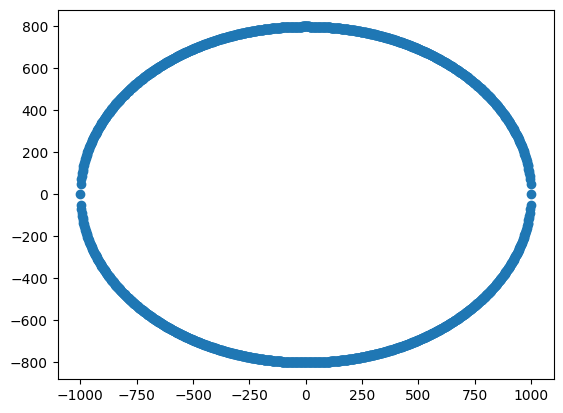

In [ ]:
def get_y_coordination(xrg, yrg):

   yc, r_yc, xandy, r_xandy = [], [], [], []
   xc, r_xc = np.linspace(-xrg, xrg, 1000), np.linspace(-xrg, xrg, 1000)

   r_xc = r_xc[r_xc != -xrg]
   r_xc = r_xc[r_xc != xrg]
   r_xc = r_xc[::-1]

   for a in xc:
      yc.append(abs(yrg/xrg)*np.sqrt(xrg**2-a**2))

   for a, b in zip(xc, yc):
       xandy.append([a, b])

   for a in r_xc:
      r_yc.append(-(abs(yrg/xrg))*np.sqrt(xrg**2-a**2))

   for a, b in zip(r_xc, r_yc):
       r_xandy.append([a, b])

   xandy = xandy + r_xandy

   return xandy





xandy=np.array(get_y_coordination(1000, 800))
xandy = np.array(xandy)

plt.scatter(xandy[:,0], xandy[:,1])
plt.show()

In [ ]:
def get_sp_xandy(xandy, DIS):

   L_points, a_idx = [], []

   for a in range(0, 1001):
      result = np.array(xandy[a, :])

      if a == 0:
         aaa = 0

      pre, q1, q2 = np.array(xandy[aaa, :]), np.array(xandy[a+1, :]), np.array(xandy[a+2, :])
      dis1, dis2 = np.linalg.norm(q1 - pre), np.linalg.norm(q2 - pre)
      d1, d2 = abs(DIS-dis1), abs(DIS-dis2)
      #print(d1)

      if d1 > d2:
         pass

      else:
         #append q2
         a_idx.append(a)
         aaa = a

      for a in a_idx:
         L_points.append(np.array(xandy[a, :]))

   return L_points



DIS = 60
xandy = np.floor(xandy)

L_points = get_sp_xandy(xandy, DIS)



#レイヤー分け
#原点からpointsを移動


L_points = np.array(L_points)
print(L_points)

[[-1000.     0.]
 [-1000.     0.]
 [ -998.    50.]
 ...
 [  997.    50.]
 [ 1000.     0.]
 [  997.   -51.]]


In [ ]:
def get_layers_points(layers, xrg, yrg, DIS):

   datum_points = []

   xrg_list, yrg_list, layers_list =\
      np.floor([((n+1)*xrg)/layers for n in range(layers-1)] + [xrg]),\
      np.floor([((n+1)*yrg)/layers for n in range(layers-1)] + [yrg]),\
      np.floor(range(1, layers+1))


   xrg_list, yrg_list, layers_list =\
      map(int, xrg_list), map(int, yrg_list), map(int, layers_list)


   for c, d in zip(xrg_list, yrg_list):
      xandy = np.array(get_y_coordination(c, d))
      xandy = np.floor(xandy)

      L_points = get_sp_xandy(xandy, DIS)
      print(L_points)
      L_points = np.array(L_points)

      datum_points.append(L_points)


   print(datum_points)

   return datum_points
"""
   datum_points_chain = list(itertools.chain.from_iterable(datum_points))
   datum_points_chain = list(itertools.chain.from_iterable(datum_points_chain))
   #print(datum_points_chain)


   x_chain = list(map(lambda x: math.floor(x), datum_points_chain[0::2]))
   y_chain = list(map(lambda x: math.floor(x), datum_points_chain[1::2]))

   #print(x_chain)

   xy_chain = [x_chain, y_chain]

   points = []
   points_temp = []

   for a, b in zip(x_chain, y_chain):
      points_temp.append([a, b])


   return datum_points


points = get_layers_points(6, 1000, 800, 500)

plot = plt.subplot()
plot.set_aspect('equal')
plot.set_xlim([-1100, 1100])
plot.set_ylim([-50, 1000])
plt.scatter(points[:,0], points[:,1])
plt.show()


#print(points)
"""

"\n   datum_points_chain = list(itertools.chain.from_iterable(datum_points))\n   datum_points_chain = list(itertools.chain.from_iterable(datum_points_chain))\n   #print(datum_points_chain)\n\n\n   x_chain = list(map(lambda x: math.floor(x), datum_points_chain[0::2]))\n   y_chain = list(map(lambda x: math.floor(x), datum_points_chain[1::2]))\n\n   #print(x_chain)\n\n   xy_chain = [x_chain, y_chain]\n\n   points = []\n   points_temp = []\n\n   for a, b in zip(x_chain, y_chain):\n      points_temp.append([a, b])\n\n\n   return datum_points\n\n\npoints = get_layers_points(6, 1000, 800, 500)\n\nplot = plt.subplot()\nplot.set_aspect('equal')\nplot.set_xlim([-1100, 1100])\nplot.set_ylim([-50, 1000])\nplt.scatter(points[:,0], points[:,1])\nplt.show()\n\n\n#print(points)\n"

In [ ]:
# marge


def get_points_merge(xrg, yrg):

   # get y coordination
   yc, r_yc, xandy, r_xandy = [], [], [], []
   xc, r_xc = np.linspace(-xrg, xrg, 1000), np.linspace(-xrg, xrg, 1000)

   r_xc = r_xc[r_xc != -xrg]
   r_xc = r_xc[r_xc != xrg]
   r_xc = r_xc[::-1]

   for a in xc:
      yc.append(abs(yrg/xrg)*np.sqrt(xrg**2-a**2))

   for a, b in zip(xc, yc):
       xandy.append([a, b])

   for a in r_xc:
      r_yc.append(-(abs(yrg/xrg))*np.sqrt(xrg**2-a**2))

   for a, b in zip(r_xc, r_yc):
       r_xandy.append([a, b])


   xandy = xandy + r_xandy
   xandy = np.floor(xandy)

   #print(xandy.ndim)
   #print(xandy.shape)
   #print(xandy[1,:])

   # get points by xandy
   L_points, a_idx = [], []
   array1001 = range(0, 1001)
   array1001 = np.array(array1001)


   for i in range(0, 1001):

      if i == 0:
         aaa = 0



      pre, q1, q2 = np.array(xandy[aaa,:]), np.array(xandy[i+1,:]), np.array(xandy[i+2,:])
      dis1, dis2 = np.linalg.norm(q1 - pre), np.linalg.norm(q2 - pre)
      d1, d2 = abs(DIS-dis1), abs(DIS-dis2)
      #print(d1)

      if d1 >= d2:
         pass

      else:
         #append q2
         a_idx.append(i)
         aaa = i

      for a in a_idx:
         L_points.append(np.array(xandy[a, :]))

   L_points = np.array(L_points)

   # L_points の重複配列を削除
   uni = np.unique(L_points, axis=0)
   #print(uni)

   ert.append(uni)
   #print(L_points.shape)

   #print(ert)

   return L_points




ert = []
DIS = 100
layers = 6
xrg = 1000
yrg = 800


xrg_list, yrg_list, layers_list =\
      np.floor([((n+1)*xrg)/layers for n in range(layers-1)] + [xrg]),\
      np.floor([((n+1)*yrg)/layers for n in range(layers-1)] + [yrg]),\
      np.floor(range(1, layers+1))


#get_points_merge(xrg, yrg)

points_temp = []

for a, b in zip(xrg_list, yrg_list):
   get_points_merge(a,b)


print(ert)



[array([[-122.,   90.],
       [ -30.,  130.],
       [  19.,  132.],
       [ 113.,   97.],
       [ 165.,   14.]]), array([[-311.,   96.],
       [-251.,  175.],
       [-167.,  230.],
       [ -71.,  259.],
       [  29.,  264.],
       [ 127.,  245.],
       [ 217.,  201.],
       [ 288.,  133.],
       [ 328.,   44.]]), array([[-485.,   97.],
       [-443.,  185.],
       [-379.,  261.],
       [-300.,  320.],
       [-211.,  362.],
       [-116.,  389.],
       [ -18.,  399.],
       [  81.,  394.],
       [ 178.,  373.],
       [ 270.,  336.],
       [ 353.,  282.],
       [ 422.,  213.],
       [ 472.,  129.],
       [ 496.,   43.]]), array([[-656.,   95.],
       [-624.,  187.],
       [-573.,  272.],
       [-508.,  345.],
       [-432.,  406.],
       [-346.,  455.],
       [-254.,  492.],
       [-158.,  517.],
       [ -60.,  530.],
       [  39.,  532.],
       [ 136.,  521.],
       [ 232.,  499.],
       [ 324.,  465.],
       [ 411.,  419.],
       [ 490.,  360.],
    

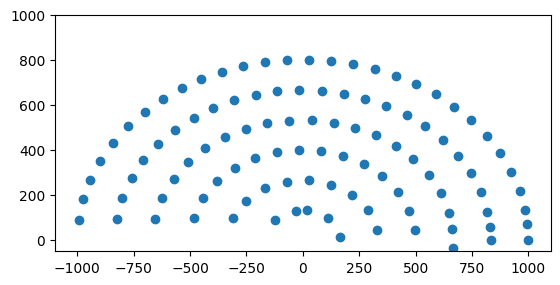

In [ ]:


def flatten(l):
    for el in l:
        if isinstance(el, collections.abc.Iterable) and not isinstance(el, (str, bytes)):
            yield from flatten(el)
        else:
            yield el

#print(list(flatten(ert)))

ert_chain = list(flatten(ert))

x_chain = list(map(lambda x: math.floor(x), ert_chain[0::2]))
y_chain = list(map(lambda x: math.floor(x), ert_chain[1::2]))

  #print(x_chain)

xy_chain = [x_chain, y_chain]

points = []
points_temp = []

for a, b in zip(x_chain, y_chain):
   points_temp.append([a, b])

points_temp = np.array(points_temp)

plot = plt.subplot()
plot.set_aspect('equal')
plot.set_xlim([-1100, 1100])
plot.set_ylim([-50, 1000])
plt.scatter(points_temp[:,0], points_temp[:,1])
plt.show()




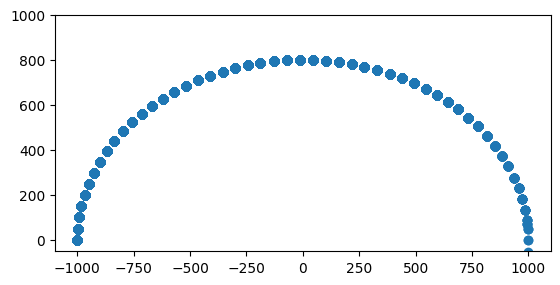

In [ ]:
plot = plt.subplot()
plot.set_aspect('equal')
plot.set_xlim([-1100, 1100])
plot.set_ylim([-50, 1000])
plt.scatter(L_points[:,0], L_points[:,1])
plt.show()

In [ ]:
a,b = [1, 10], [1, 1]
eq = lambda x, y : x + y
c = list(map(eq, a, b))
print(c)


ff = 0
result = np.array(xandy[ff, ff])
print(result)


result2 = np.array(xandy[ff+1, ff+1])
print(result2)

[2, 11]
-1000.0
31.0
1010.0495037373169


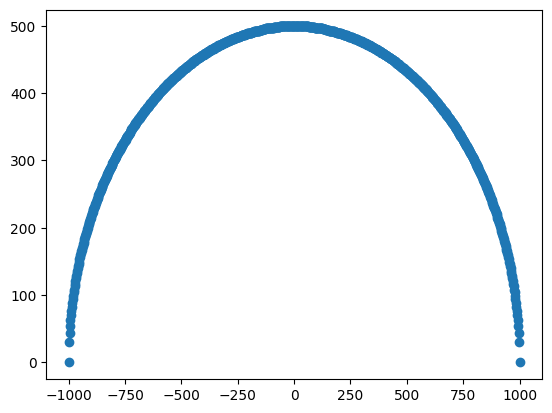

"\nplt.plot(points[:,0], points[:,1], 'ro', alpha = 0.0)\nfor i in range(points.shape[0]):\n   plt.text(points[i,0], points[i,1], str(i))\nplt.show()\n"

In [ ]:
# scatter

xandy = np.array(xandy)


plt.scatter(xandy[:,0], xandy[:,1])
plt.show()

"""
plt.plot(points[:,0], points[:,1], 'ro', alpha = 0.0)
for i in range(points.shape[0]):
   plt.text(points[i,0], points[i,1], str(i))
plt.show()
"""